In [1]:
# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
# Technical Indicators
# import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pickle
#date and time
import datetime as dt
current_date = dt.datetime.now()

# Data Manipulation
import numpy as np
import pandas as pd

In [2]:
# Read the data
# Df = yf.download('^NSEI', '2012-12-31', current_date, auto_adjust=True)
# Df2 = yf.download('SPY', '2012-12-31', current_date, auto_adjust=True)
# Df3 = yf.download('^IRX', '2012-12-31', current_date, auto_adjust=True)

# Df.info()

ticker = 'MIC:NLMK'
exchange = ''

Data_for_Portfolio_TOTAL = pd.DataFrame()

with open(f'''C:/Users/Anton/Desktop/Backtesting/BANKA/data_json_{ticker.replace(exchange, '')}.pickle''',  # УКАЗАТЬ СВОЙ ПУТЬ !!!!
          'rb') as f:
    data_json = pickle.load(f)

with open(
        f'''C:/Users/Anton/Desktop/Backtesting/BANKA/data_json_keyratios_{ticker.replace(exchange, '')}.pickle''',  # УКАЗАТЬ СВОЙ ПУТЬ !!!!
        'rb') as f:
    data_json_keyratios = pickle.load(f)

#     print(data_json)
try:
    date_list = pd.Series(data_json['financials']['annuals']['Fiscal Year'])
    keyratios = pd.DataFrame(data_json_keyratios['Fundamental'], index=[0])
    income_df = pd.DataFrame(data_json['financials']['annuals']['income_statement']).set_index(
        date_list).replace('No Debt', 0).replace('At Loss', 0).replace('-', 0).replace('', 0).replace('N/A',
                                                                                                      0).astype(
        float)
    balance_df = pd.DataFrame(data_json['financials']['annuals']['balance_sheet']).set_index(date_list).replace(
        'No Debt', 0).replace('At Loss', 0).replace('', 0).replace('-', 0).replace('N/A', 0).astype(float)
    cashflow_df = pd.DataFrame(data_json['financials']['annuals']['cashflow_statement']).set_index(
        date_list).replace('No Debt', 0).replace('At Loss', 0).replace('', 0).replace('-', 0).replace('N/A',
                                                                                                      0).astype(
        float)
    valuation_ratios_df = pd.DataFrame(data_json['financials']['annuals']['valuation_ratios']).set_index(
        date_list).replace('No Debt', 0).replace('At Loss', 0).replace('', 0).replace('-', 0).replace('N/A',
                                                                                                      0).astype(
        float)
    valuation_and_quality_df = pd.DataFrame(
        data_json['financials']['annuals']['valuation_and_quality']).set_index(date_list).drop(
        ['Restated Filing Date', 'Filing Date', 'Earnings Release Date'], axis=1).replace('', 0).replace(
        'No Debt', 0).replace('At Loss', 0).replace('-', 0).replace('N/A', 0).astype(float)
    common_size_ratios_df = pd.DataFrame(data_json['financials']['annuals']['common_size_ratios']).set_index(
        date_list).replace('No Debt', 0).replace('At Loss', 0).replace('', 0).replace('-', 0).replace('N/A',
                                                                                                      0).replace(
        'Negative Tangible Equity', 0).astype(float)
    # per_share_data_array_df = pd.DataFrame(data_json['financials']['annuals']['per_share_data_array']).set_index(date_list).replace('-', 0).replace('N/A', 0).astype(float)
    per_share_data_df = pd.DataFrame(data_json['financials']['annuals']['per_share_data_array']).set_index(
        date_list).replace('', 0).replace('No Debt', 0).replace('-', 0).replace('N/A', 0).astype(float)

    check = 1
except:
    check = 0
    # print('Data error')
    pass

In [3]:
# keyratios.columns.tolist()
# income_df.columns.tolist()
# balance_df.columns.tolist()
# cashflow_df.columns.tolist()
# valuation_ratios_df.columns.tolist()
# valuation_and_quality_df.columns.tolist()
# common_size_ratios_df.columns.tolist()
# per_share_data_df.columns.tolist()

DF_all = pd.concat([per_share_data_df, common_size_ratios_df, valuation_and_quality_df, valuation_ratios_df, cashflow_df, balance_df, \
           income_df],axis=1, ignore_index=False)
 

<AxesSubplot:>

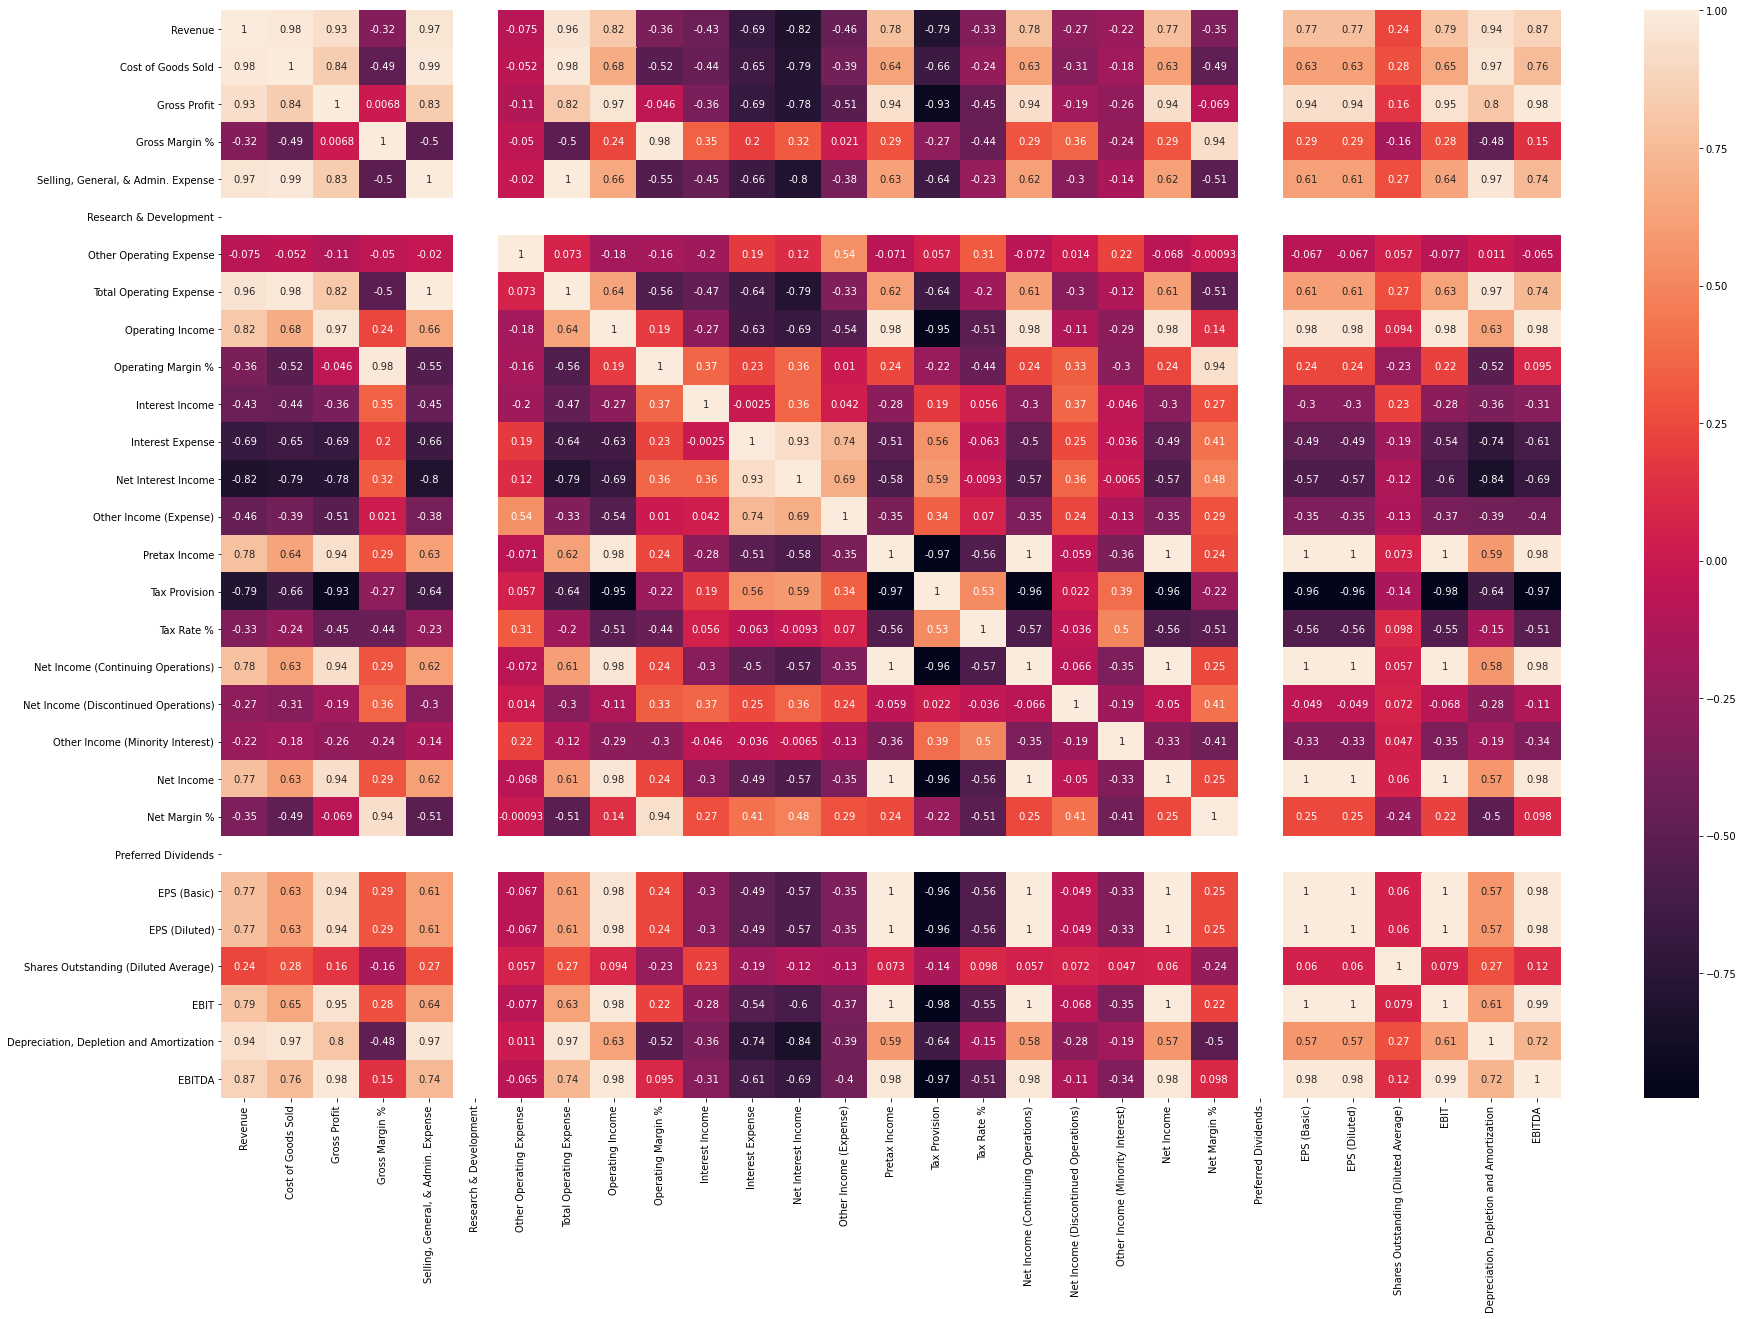

In [71]:
cov_matrix = income_df.cov()
corr_matrix = income_df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(income_df.corr(), annot=True)

# фичи

In [4]:
# Calculate 3-day moving average of close prices
Df = pd.DataFrame()
Df_find = pd.DataFrame()

Df['Total Operating Expense'] = DF_all['Total Operating Expense'] 

# Calculate 15-day moving average of close prices
Df['Revenue'] = DF_all['Revenue'] 
# Calculate 60-day moving average of close prices
Df['Operating Income'] = DF_all['Operating Income'] 

# Calculate the correlation between close price and 3 day moving average
Df['Gross Margin %'] = DF_all['Gross Margin %'].iloc[:,:1]  

Df['Operating Margin %'] = DF_all['Operating Margin %'].iloc[:,:1] 
# Df['Std_D'] = Df['Open']-Df['Low']

Df['Depreciation, Depletion and Amortization'] = DF_all['Depreciation, Depletion and Amortization'] 

Df['EBITDA'] = DF_all['EBITDA'] 

Df
# Df['EBITDA'][1:]
# Df['Gross Margin %'][:-1]

,Total Operating Expense,Revenue,Operating Income,Gross Margin %,Operating Margin %,"Depreciation, Depletion and Amortization",EBITDA
2003-12,4057.007,72140.283,25666.483,41.202,35.579,4612.757,30600.507
2004-12,8242.644,123588.147,57704.383,53.360,46.691,6684.455,71835.318
2005-12,5135.486,125756.289,53609.961,46.714,42.630,8129.573,63059.919
2006-12,13487.210,159120.850,64716.090,49.147,40.671,9421.007,79201.854
2007-12,21617.004,189618.741,70305.991,48.478,37.078,10015.126,87098.429
2008-12,18028.065,357101.627,146528.760,46.081,41.033,15231.792,112843.263
2009-12,29140.456,184167.373,30535.982,32.403,16.581,14341.215,27862.600
2010-12,33464.697,255134.550,56606.352,35.303,22.187,14341.799,67446.369
2011-12,54145.020,374893.898,53242.095,28.645,14.202,18817.548,72586.572
2012-12,53625.406,370049.104,34481.899,23.810,9.318,23369.399,53302.192


In [5]:
X = Df[['Total Operating Expense', 'Revenue', 'Operating Income', 'Gross Margin %', 'Operating Margin %', \
        'Depreciation, Depletion and Amortization']][:-1]

Df_find
# .drop('EBITDA',  axis='columns')
# X = Df[['SPY']]
Df_find

Df['Total Operating Expense'] = DF_all['Total Operating Expense'] 

# Calculate 15-day moving average of close prices
Df['Revenue'] = DF_all['Revenue'] 
# Calculate 60-day moving average of close prices
Df['Operating Income'] = DF_all['Operating Income'] 

# Calculate the correlation between close price and 3 day moving average
Df['Gross Margin %'] = DF_all['Gross Margin %'].iloc[:,:1]  

Df['Operating Margin %'] = DF_all['Operating Margin %'].iloc[:,:1] 
# Df['Std_D'] = Df['Open']-Df['Low']

Df['Depreciation, Depletion and Amortization'] = DF_all['Depreciation, Depletion and Amortization'] 

Df['EBITDA'] = DF_all['EBITDA'] 

In [7]:
yU = Df['EBITDA'][1:]

In [8]:
imp = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
steps = [('imputation', imp),
         ('scaler',StandardScaler()),
         ('linear',LinearRegression())]     
pipeline = Pipeline(steps)

In [9]:
parameters = {'linear__fit_intercept':[0,1]}

In [10]:
reg = GridSearchCV(pipeline, parameters, cv=5)

In [11]:
t = .7
split = int(t*len(Df))
reg.fit(X[:split],yU[:split])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('scaler', StandardScaler()),
                                       ('linear', LinearRegression())]),
             param_grid={'linear__fit_intercept': [0, 1]})

In [12]:
best_fit = reg.best_params_['linear__fit_intercept']
best_fit

1

In [13]:
reg = LinearRegression(fit_intercept=best_fit)

In [14]:
X = imp.fit_transform(X,yU)

In [15]:
reg.fit(X[:split], yU[:split])
y_predict = reg.predict(X[:-1])

# Assign the predicted values to a new column in the dataframe
# Df.reset_index(inplace=True)


Df2 = pd.DataFrame()

Df2['Predict EBITDA'] = y_predict
# Df.loc[Df['Predict close'] < 0, 'Predict close'] = 0

In [16]:
Df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1991-09 to TTM
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Total Operating Expense                   31 non-null     float64
 1   Revenue                                   31 non-null     float64
 2   Operating Income                          31 non-null     float64
 3   Gross Margin %                            31 non-null     float64
 4   Operating Margin %                        31 non-null     float64
 5   Depreciation, Depletion and Amortization  31 non-null     float64
 6   EBITDA                                    31 non-null     float64
dtypes: float64(7)
memory usage: 1.9+ KB


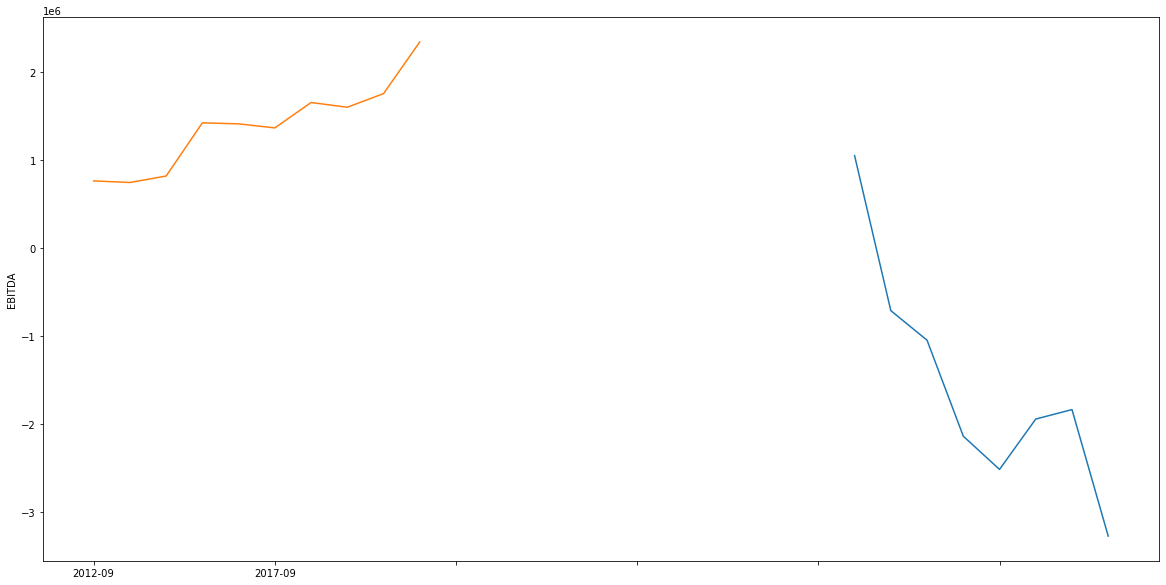

In [36]:
Df2['Predict EBITDA'][split:].plot(figsize=(10, 5))
Df['EBITDA'][split:].plot(figsize=(20, 10))
plt.ylabel("EBITDA")
plt.show()

In [18]:
# coefficient of determination R2 of the prediction  The best possible score is 1.0

reg.score(X,yU)


-6.408252317120053

In [74]:
y = Df['EBITDA'][1:]
X = Df[['Total Operating Expense', 'Revenue', 'Operating Income', 'Gross Margin %', 'Operating Margin %', 'Depreciation, Depletion and Amortization']][:-1]


In [16]:
x_train, x_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=.3, random_state=17) # при random_state=17 R2 максимален
reg = LinearRegression(fit_intercept=True)


In [76]:

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
y_pred

array([172546.88796538,  99770.7917671 , 100405.14171538, 296812.42962135,
        60087.25783191, 323667.96389863])

In [77]:
y_test

array([144613.079,  87098.429,  79201.854, 102519.87 ,  27862.6  ,
       143823.726])

In [78]:
Df['EBITDA']

2003-12     30600.507
2004-12     71835.318
2005-12     63059.919
2006-12     79201.854
2007-12     87098.429
2008-12    112843.263
2009-12     27862.600
2010-12     67446.369
2011-12     72586.572
2012-12     53302.192
2013-12     45426.381
2014-12    115767.010
2015-12    143823.726
2016-12    102519.870
2017-12    144613.079
2018-12    233730.282
2019-12    148978.524
2020-12    165587.891
TTM        328304.128
Name: EBITDA, dtype: float64

In [79]:
reg.score(x_train,y_train)

0.9287992784338894

<AxesSubplot:>

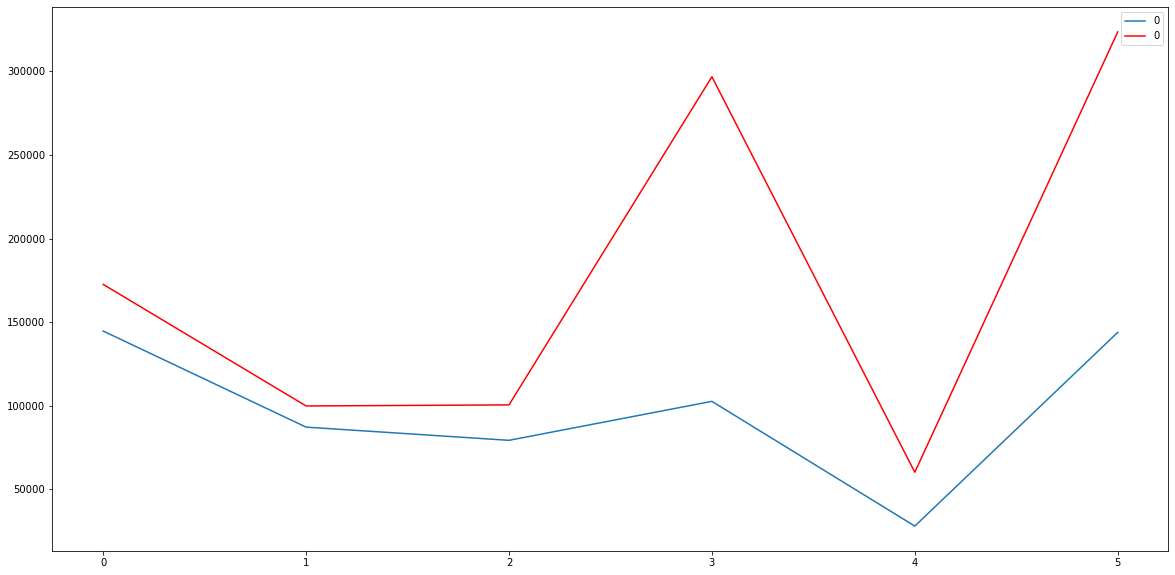

In [80]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
pd.DataFrame(y_test).plot( ax=ax)
pd.DataFrame(y_pred).plot( ax=ax, color='red')

In [81]:
pd.DataFrame(y_pred)

,0
0,172546.887965
1,99770.791767
2,100405.141715
3,296812.429621
4,60087.257832
5,323667.963899


In [82]:
# NEW

In [94]:
y_pred

array([ 55661.8945394 ,  97812.55438913, 100405.14171538,  99770.7917671 ,
        91044.16750122,  60087.25783191,  72698.00629833,  63160.97420686,
        43895.57468624,  75961.6362322 , 127566.27292983, 323667.96389863,
       296812.42962135, 172546.88796538, 209855.57861134, 178312.54200176,
       133542.55225001, 329356.09535368])

In [95]:
y

2004-12     71835.318
2005-12     63059.919
2006-12     79201.854
2007-12     87098.429
2008-12    112843.263
2009-12     27862.600
2010-12     67446.369
2011-12     72586.572
2012-12     53302.192
2013-12     45426.381
2014-12    115767.010
2015-12    143823.726
2016-12    102519.870
2017-12    144613.079
2018-12    233730.282
2019-12    148978.524
2020-12    165587.891
TTM        328304.128
Name: EBITDA, dtype: float64

In [85]:
len(y_pred)

6

In [93]:
y_pred = reg.predict(X)
y_pred
y_pred

array([ 55661.8945394 ,  97812.55438913, 100405.14171538,  99770.7917671 ,
        91044.16750122,  60087.25783191,  72698.00629833,  63160.97420686,
        43895.57468624,  75961.6362322 , 127566.27292983, 323667.96389863,
       296812.42962135, 172546.88796538, 209855.57861134, 178312.54200176,
       133542.55225001, 329356.09535368])

<AxesSubplot:>

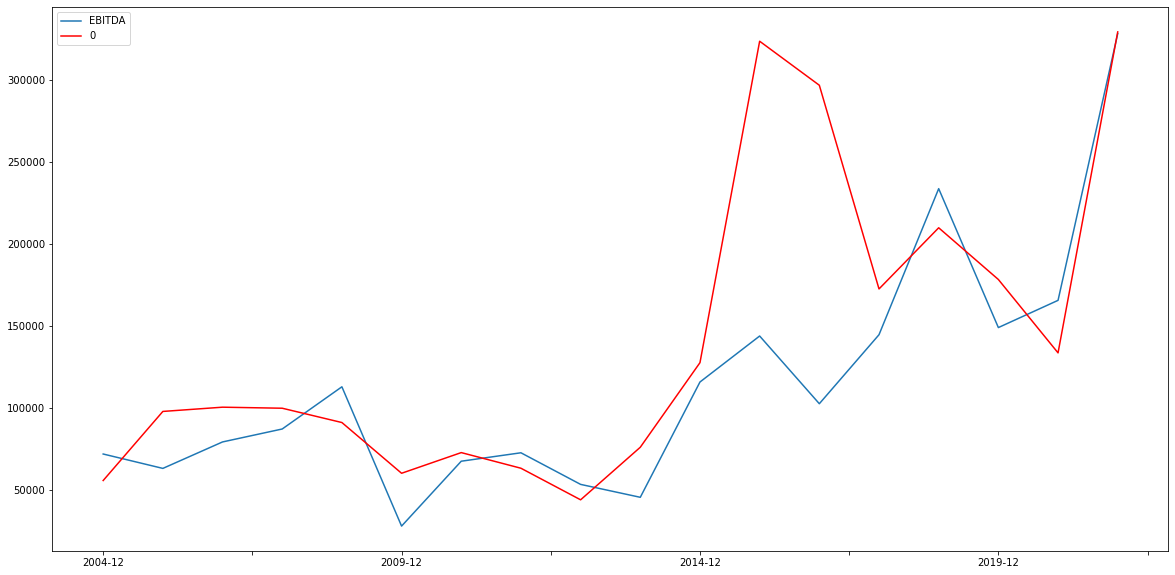

In [96]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
pd.DataFrame(y).plot( ax=ax)
pd.DataFrame(y_pred).plot( ax=ax, color='red')

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [102]:
r2

0.150875242554529

In [103]:
rmse

4344555323.93713

# Градиентный спуск

In [50]:
y = Df['EBITDA'][1:]
X = Df[['Total Operating Expense', 'Revenue', 'Operating Income', 'Gross Margin %', 'Operating Margin %', 'Depreciation, Depletion and Amortization']][:-1]


In [61]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

X = scale(X)
y = scale(y)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.15)

sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='elasticnet')
sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)

# cv_score = cross_val_score(lsvr, x, y, cv=5)
# print("CV mean score: ", cv_score.mean())

ypred = sgdr.predict(X)

mse = mean_squared_error(y, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

scaler.inverse_transform(X)

R-squared: 0.6282611183214015
MSE:  0.4738969712132529
RMSE:  0.6884017513147777


array([[4.05700700e+03, 7.21402830e+04, 2.56664830e+04, 4.12020000e+01,
        3.55790000e+01, 4.61275700e+03],
       [8.24264400e+03, 1.23588147e+05, 5.77043830e+04, 5.33600000e+01,
        4.66910000e+01, 6.68445500e+03],
       [5.13548600e+03, 1.25756289e+05, 5.36099610e+04, 4.67140000e+01,
        4.26300000e+01, 8.12957300e+03],
       [1.34872100e+04, 1.59120850e+05, 6.47160900e+04, 4.91470000e+01,
        4.06710000e+01, 9.42100700e+03],
       [2.16170040e+04, 1.89618741e+05, 7.03059910e+04, 4.84780000e+01,
        3.70780000e+01, 1.00151260e+04],
       [1.80280650e+04, 3.57101627e+05, 1.46528760e+05, 4.60810000e+01,
        4.10330000e+01, 1.52317920e+04],
       [2.91404560e+04, 1.84167373e+05, 3.05359820e+04, 3.24030000e+01,
        1.65810000e+01, 1.43412150e+04],
       [3.34646970e+04, 2.55134550e+05, 5.66063520e+04, 3.53030000e+01,
        2.21870000e+01, 1.43417990e+04],
       [5.41450200e+04, 3.74893898e+05, 5.32420950e+04, 2.86450000e+01,
        1.42020000e+01, 

<AxesSubplot:>

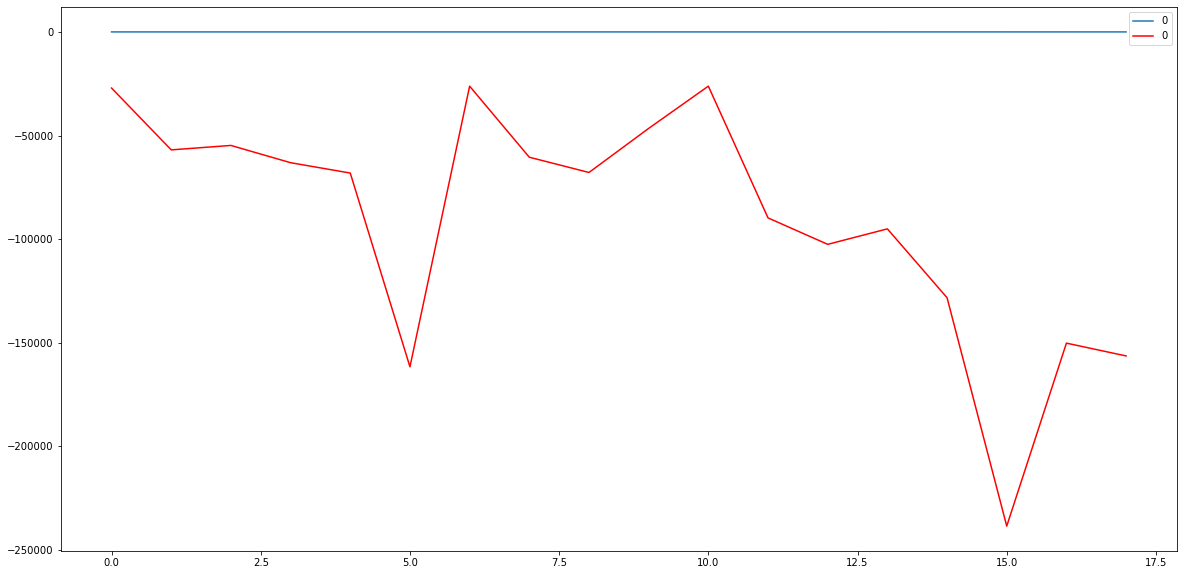

In [60]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
pd.DataFrame(y).plot( ax=ax)
pd.DataFrame(ypred).plot( ax=ax, color='red')

In [37]:
ypred = sgdr.predict(xtest)

In [53]:
y

array([-0.59878063, -0.72146238, -0.49579505, -0.38539943, -0.02548175,
       -1.2135276 , -0.66013897, -0.58827795, -0.85787726, -0.9679826 ,
        0.01539279,  0.40763102, -0.16980475,  0.41866633,  1.66454179,
        0.47969608,  0.71189819,  2.98670216])

In [52]:
ypred

array([-1.11750549, -0.46572015, -0.74941336, -0.49668956, -0.40410729,
       -0.6118135 , -0.7391039 , -0.6023502 , -0.3402255 , -0.28796717,
       -0.2253844 ,  1.29668985,  1.19775705,  0.37582159,  0.74893172,
        1.17889937,  0.70268443,  1.49673097])

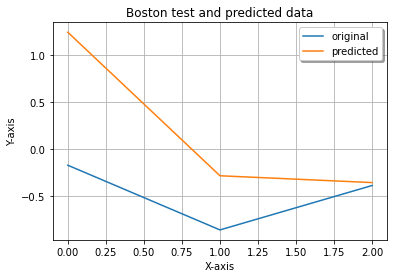

In [28]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Логистическая регрессия


In [33]:
df = pdr.get_data_yahoo('^NSEI', '2012-12-31', current_date)
df = df.fillna(method='backfill')
df = df.iloc[:,:4]
df.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2012-12-31 to 2021-09-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2138 non-null   float64
 1   High    2138 non-null   float64
 2   Low     2138 non-null   float64
 3   Close   2138 non-null   float64
dtypes: float64(4)
memory usage: 83.5 KB


In [34]:
df['S_3'] = df['Close'].rolling(window=3).mean()
df['S_10'] = df['Close'].rolling(window=10).mean()

df['Corr'] = df['Close'].rolling(window=10).corr(df['S_3'])

df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.fillna(method='backfill')
X = df.iloc[:,:9]
X



# X = Df[['Open', 'S_3', 'S_15', 'S_60', 'OD', 'OL', 'Corr', 'SPY', 'Treasury']]


NameError: name 'ta' is not defined

In [ ]:
cov_matrix = df.cov()
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [ ]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
X_train.fillna(method='backfill')

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

probability = model.predict_proba(X_test)
print(probability)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predicted))

In [ ]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)


In [ ]:
# Df['Predict close']
# df['Close'] = Df['Predict close'].tolist()
# df['Close']

In [ ]:
Df['Predict close'][split:]

In [ ]:

# df['Close'][split:] = Df['Predict close'][split:].tolist() 

# df['Open'][-1] = Df['Predict close'].tolist()[-1] 

X2 = df[['Open', 'High', 'Low', 'Close', 'S_10', 'Corr', 'RSI', 'Open-Close', 'Open-Open']]
X2[split:]

In [ ]:

df['Predicted_Signal'] = model.predict(X)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])

df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()
df['Predicted_Signal'][::-1].head(50)
df['Nifty_returns']

In [ ]:
 df_res['Predicted_Signal'] 

In [ ]:
df[split:]['Nifty_returns']

In [ ]:
df[split:]['Nifty_returns'].values